# Analyzing Popular Repositories on GitHub

## Introduction

GitHub is arguably one of the most popular version control and source code management platforms out there. It is also home to one of the largest social networking sites for programmers and a platform where software developers can showcase their skills and past project works to recruiters and hiring managers.

In this report, we will be analyzing data on GitHub repositories to try to gain invaluable insights and information like user behaviour. We will also aim to answer questions like what contributes to a repository's popularity, what technologies and topics are trending among developers nowadays, and much more.

*The [‘GitHub Repositories 2020’](https://www.kaggle.com/vatsalparsaniya/github-repositories-analysis) dataset from Kaggle was used in this project as it is the most up-to-date dataset.*

### Objectives

1. Read, clean and structure data to make it suitable for analysis
2. Analyze top repositories based on popularity
3. Analyze users with many repositories
4. Understand contribution activities across the repositories
5. Explore most popular tags

## Data Exploration & Implementation

Import necessary libraries and reading the input data, 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read input data
github_data_df = pd.read_csv("Github_data.csv")

# Dropping duplicated columns
github_data_df = github_data_df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)

# Display basic information about the dataset
github_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   topic             1500 non-null   object 
 1   name              1500 non-null   object 
 2   user              1500 non-null   object 
 3   star              1500 non-null   object 
 4   fork              1500 non-null   object 
 5   watch             1500 non-null   object 
 6   issue             1500 non-null   object 
 7   pull_requests     1500 non-null   object 
 8   projects          1313 non-null   float64
 9   topic_tag         1500 non-null   object 
 10  discription_text  1480 non-null   object 
 11  discription_url   669 non-null    object 
 12  commits           1500 non-null   object 
 13  branches          1500 non-null   object 
 14  packages          1500 non-null   int64  
 15  releases          1500 non-null   int64  
 16  contributers      1500 non-null   object 


*As you can see, the dataframe contains 19 columns, out of which, 11 columns were deemed as important contributors to the popularity of GitHub repositories, as well as its relevance* 

The column "contributers" is a typo so let's correct it and rename the columns for better clarity. 

In [3]:
# Get relevant columns out
github_df = github_data_df[["topic", "name", "user", "star", "fork", "watch", 
                                 "issue", "pull_requests", "topic_tag", "commits", "contributers"]]

# Pass dictionary with oldnames as keys and newnames as values to rename function
newnames = ["Topic", "Repo_Name", "User_Name", "Star", "Fork", "Watch", 
            "Issues", "Pull_Requests", "Topic_Tags", "Commits", "Contributors"]
oldnames = github_df.columns
github_df = github_df.rename(columns = dict(zip(oldnames, newnames)))

# Take a look at first five rows 
github_df.head()

,Topic,Repo_Name,User_Name,Star,Fork,Watch,Issues,Pull_Requests,Topic_Tags,Commits,Contributors
0,Data-Science,keras,keras-team,47.9k,18.1k,2.1k,"2,940",87,"['deep-learning', 'tensorflow', 'neural-networ...","5,342",49
1,Data-Science,scikit-learn,scikit-learn,40.3k,19.6k,2.2k,"1,505",764,"['machine-learning', 'python', 'statistics', '...","25,405",108
2,Data-Science,PythonDataScienceHandbook,jakevdp,23.1k,9.9k,1.5k,65,67,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",234,0
3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21k,6.6k,1.4k,127,38,"['bayesian-methods', 'pymc', 'mathematical-ana...","1,079",0
4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18.4k,8.2k,1.5k,7,0,[],363,0


### A quick brief about the columns in the data:

* **Topic** – A label describing the field or domain of the repo
* **Repo_Name** – Name of the repo (short name for repository)
* **User_Name** – Repository owner’s name
* **Star** – Number of stars a repo has received
* **Fork** – Number of times a repo has been forked
* **Watch** – Number of users watching the repo
* **Issues** – Number of open issues
* **Pull_Requests** – Total pull requests raised
* **Topic_Tags** – List of topic tags added to that repo by user
* **Commits** – Total number of commits made
* **Contributors** – Number of people contributing to the repo

*Notice how in the **Star, Fork** and **Watch** columns, the values are in thousands. Let's clean the data to remove the 'k's, show the full number and convert to 'float' datatype.*

*Also notice how the **Issues** and **Commits** columns have ',' in their entries. Let's also remove those.*

In [4]:
# Converting Star, Fork and Watch columns to numeric by replacing 'k's with 1000
github_df["Star"] = github_df["Star"].apply(lambda x: float(x.rstrip("k"))*1000 if "k" in str(x) else float(x))
github_df["Fork"] = github_df["Fork"].apply(lambda x: float(x.rstrip("k"))*1000 if "k" in str(x) else float(x))
github_df["Watch"] = github_df["Watch"].apply(lambda x: float(x.rstrip("k"))*1000 if "k" in str(x) else float(x))

# Remove ',' from Issues and Commits columns
github_df["Issues"] = github_df["Issues"].apply(lambda x: x.replace(",", ""))
github_df["Commits"] = github_df["Commits"].apply(lambda x: x.replace(",", ""))

# Convert Issues, Pull_Requests, Commits, Contributors columns from object to numeric
cols = ["Issues", "Pull_Requests", "Commits", "Contributors"]
github_df[cols] = github_df[cols].apply(pd.to_numeric, errors="coerce", axis=1)

# Check
github_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Topic          1500 non-null   object 
 1   Repo_Name      1500 non-null   object 
 2   User_Name      1500 non-null   object 
 3   Star           1500 non-null   float64
 4   Fork           1500 non-null   float64
 5   Watch          1500 non-null   float64
 6   Issues         1499 non-null   float64
 7   Pull_Requests  1499 non-null   float64
 8   Topic_Tags     1500 non-null   object 
 9   Commits        1500 non-null   float64
 10  Contributors   1495 non-null   float64
dtypes: float64(7), object(4)
memory usage: 129.0+ KB


Now that the necessary columns are numeric, we can pass them through the *describe()* function to obtain statistical information.

In [5]:
# Display basic statistical details about the columns
github_df.describe()

,Star,Fork,Watch,Issues,Pull_Requests,Commits,Contributors
count,1500.000000,1500.000000,1500.000000,1499.000000,1499.000000,1500.000000,1495.000000
mean,8058.556667,1845.994667,380.881333,116.228152,15.527685,2535.753333,28.657525
std,17031.342041,4572.215953,754.014969,344.511792,55.227818,21605.630660,79.740051
min,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,576.000000,109.000000,37.000000,2.000000,0.000000,50.000000,0.000000
50%,1800.000000,385.500000,108.000000,14.000000,2.000000,196.000000,0.000000
75%,9025.000000,1700.000000,416.000000,72.500000,9.000000,953.500000,20.000000
max,310000.000000,80900.000000,8400.000000,4337.000000,851.000000,797646.000000,877.000000


## 1. Analysis of Top Repositories Based on Popularity

We will try to use the **Star, Fork** and **Watch** columns to answer why a GitHub repository is popular.

#### Recap:

* Star – When a user likes the repo or they want to show some appreciation, they Star it.
* Watch – When a user wants to be notified of all the activities in a repo, then they Watch it.
* Fork – When a user wants a copy of the repo or they intend to make any contributions, they Fork it.

In [6]:
# Create a dataframe with average values of the columns across all topics
pop_mean_df = github_df.groupby("Topic").mean().reset_index()

# Display dataframe
pop_mean_df

,Topic,Star,Fork,Watch,Issues,Pull_Requests,Commits,Contributors
0,Android-studio,121.43,39.42,10.07,7.120000,0.350000,113.66,3.900000
1,Arduino,1979.69,839.55,168.55,82.390000,12.210000,1083.87,21.410000
2,Computer-Vision,4925.00,1537.83,283.24,133.220000,14.150000,1462.67,10.270000
3,Data-Science,6669.00,2145.86,400.22,146.950000,20.620000,2732.74,29.561224
4,GAN,2440.45,668.75,122.66,41.120000,3.230000,425.29,9.850000
5,Open-CV,271.49,133.17,26.17,5.210000,2.150000,40.56,0.820000
6,Raspberry pi,1515.87,330.78,124.25,47.520000,4.750000,9041.52,29.410000
7,awesome,1653.00,279.10,113.20,14.200000,2.090000,205.36,0.940000
8,c++,19380.35,3656.02,874.50,234.800000,30.310000,6349.22,52.595960
9,flutter,3556.83,666.05,131.05,53.373737,4.920000,638.29,20.240000


We can see that some of the top repository topics are **JavaScript, Java, C++ etc.**

### Analysis of Star column

Let's visualize the average number of stars across topics.

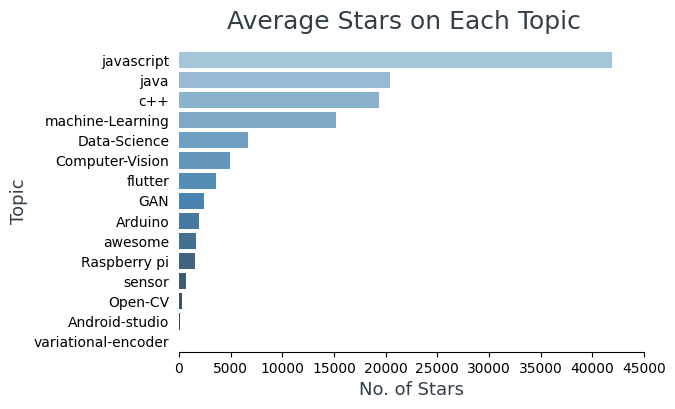

In [7]:
# Let's sort the Star column in the dataframe for a nicer barplot
sorted_star_df = pop_mean_df.sort_values("Star", ascending=False)

# Set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# Add color to edge
plt.rcParams["axes.edgecolor"]="#333F4B"

# Customize spines and tick parameters
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(axis="both", which="both", labelsize=10, bottom=True, left=False)
ax.set_xlim(0,45000)

# Remove grid and set background color
ax.grid(False)
ax.set_facecolor("white")

# Plot the data and set palette
sns.barplot(data=sorted_star_df, x="Star", y="Topic", palette=("Blues_d"))

# Set x and y-axis labels and title
ax.set_xlabel("No. of Stars", fontsize=13, color = "#333F4B")
ax.set_ylabel("Topic", fontsize=13, color = "#333F4B")
fig.suptitle("Average Stars on Each Topic", fontsize=18, color = "#333F4B")
plt.show()

Now let's take a look at the top 10 most starred repositories.

In [8]:
# Top 10 most starred repos
github_df.nlargest(n=10, columns="Star")[["Repo_Name", "Topic", "Star"]]

,Repo_Name,Topic,Star
1000,freeCodeCamp,javascript,310000.0
1001,vue,javascript,163000.0
1002,react,javascript,147000.0
100,tensorflow,machine-Learning,144000.0
1003,bootstrap,javascript,140000.0
1004,You-Dont-Know-JS,javascript,120000.0
1100,coding-interview-university,c++,110000.0
800,CS-Notes,java,98400.0
1101,CS-Notes,c++,98400.0
801,javascript,java,94800.0


The most starred repository is **FreeCodeCamp** in the topic **JavaScript** with **310000.0 stars**.

### Analysis of Watch column

Let's visualize the average number of watchers across topics.

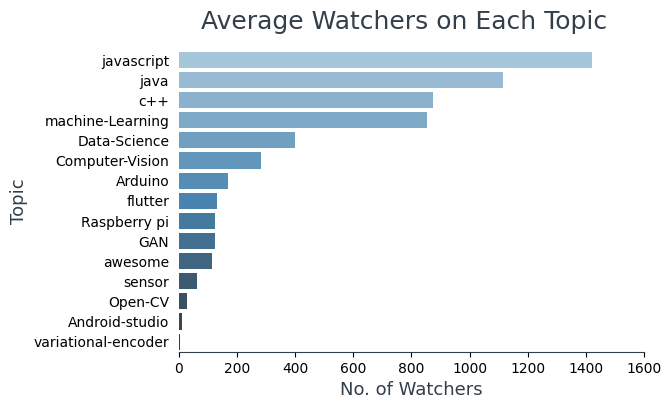

In [9]:
# Let's sort the Watch column in the dataframe for a nicer barplot
sorted_watch_df = pop_mean_df.sort_values("Watch", ascending=False)

# Set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# Add color to edge
plt.rcParams["axes.edgecolor"]="#333F4B"

# Customize spines and tick parameters
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(axis="both", which="both", labelsize=10, bottom=True, left=False)
ax.set_xlim(0,1600)

# Remove grid and set background color
ax.grid(False)
ax.set_facecolor("white")

# Plot the data
sns.barplot(data=sorted_watch_df, x="Watch", y="Topic", palette=("Blues_d"))

# Set x and y-axis labels and title
ax.set_xlabel("No. of Watchers", fontsize=13, color = "#333F4B")
ax.set_ylabel("Topic", fontsize=13, color = "#333F4B")
fig.suptitle("Average Watchers on Each Topic", fontsize=18, color = "#333F4B")
plt.show()

In [10]:
# Top 10 repos with the most watchers
github_df.nlargest(n=10, columns="Watch")[["Repo_Name", "Topic", "Watch"]]

,Repo_Name,Topic,Watch
100,tensorflow,machine-Learning,8400.0
1000,freeCodeCamp,javascript,8400.0
1003,bootstrap,javascript,7200.0
1133,CodeHub,c++,6800.0
1002,react,javascript,6700.0
1001,vue,javascript,6100.0
1100,coding-interview-university,c++,5800.0
1010,free-programming-books-zh_CN,javascript,5500.0
1004,You-Dont-Know-JS,javascript,5400.0
800,CS-Notes,java,4800.0


The repository with the most watchers is **TensorFlow** in the topic **Machine Learning** with **8400 watchers**.

### Analysis of Fork column

Let's visualize the average number of forks across topics.

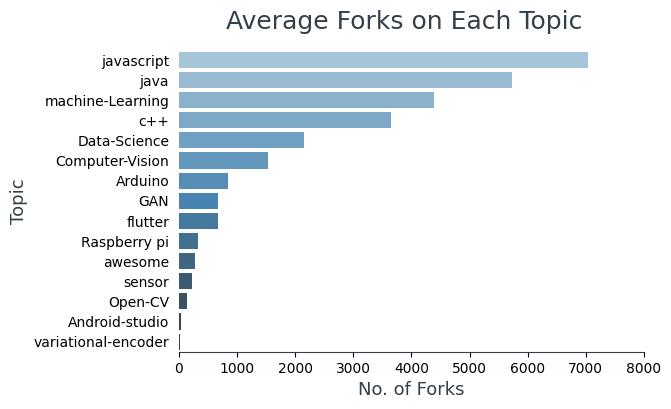

In [11]:
# Let's sort the Watch column in the dataframe for a nicer barplot
sorted_fork_df = pop_mean_df.sort_values("Fork", ascending=False)

# Set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# Add color to edge
plt.rcParams["axes.edgecolor"]="#333F4B"

# Customize spines and tick parameters
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(axis="both", which="both", labelsize=10, bottom=True, left=False)
ax.set_xlim(0,8000)

# Remove grid and set background color
ax.grid(False)
ax.set_facecolor("white")

# Plot the data
sns.barplot(data=sorted_fork_df, x="Fork", y="Topic", palette=("Blues_d"))

# Set x and y-axis labels and title
ax.set_xlabel("No. of Forks", fontsize=13, color = "#333F4B")
ax.set_ylabel("Topic", fontsize=13, color = "#333F4B")
fig.suptitle("Average Forks on Each Topic", fontsize=18, color = "#333F4B")
plt.show()

In [12]:
# Top 10 repos with the most forks
github_df.nlargest(n=10, columns="Fork")[["Repo_Name", "Topic", "Fork"]]

,Repo_Name,Topic,Fork
100,tensorflow,machine-Learning,80900.0
1003,bootstrap,javascript,68700.0
300,opencv,Computer-Vision,34900.0
800,CS-Notes,java,32100.0
1100,coding-interview-university,c++,32100.0
1101,CS-Notes,c++,32100.0
806,spring-boot,java,29600.0
64,courses,Data-Science,28500.0
1002,react,javascript,28500.0
802,JavaGuide,java,26300.0


The repository with the most forks is **TensorFlow** in the topic **Machine Learning** with **80900.0 forks**.

### Relationship Between Star, Watch and Fork columns

When a user has interest in a repository, there is a possibility where they will also give it a star, watch or fork it. But how much do these factors relate to one another? Let's explore that next.

### Star and Fork

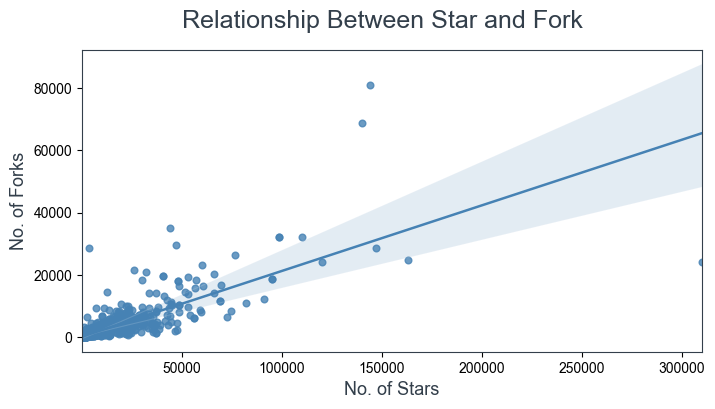

In [13]:
# Set figure size and dpi
fig, ax = plt.subplots(figsize=(8,4), dpi=100)

# Set seaborn theme for background grids
sns.set_theme("paper")

# Plot the data
sns.regplot(data=github_df, x="Star", y="Fork", color="#4682B4")

# Set x and y-axis labels and title
ax.set_xlabel("No. of Stars", fontsize=13, color="#333F4B")
ax.set_ylabel("No. of Forks", fontsize=13, color="#333F4B")
fig.suptitle("Relationship Between Star and Fork", fontsize=18, color="#333F4B")
plt.show()

### Star and Watch

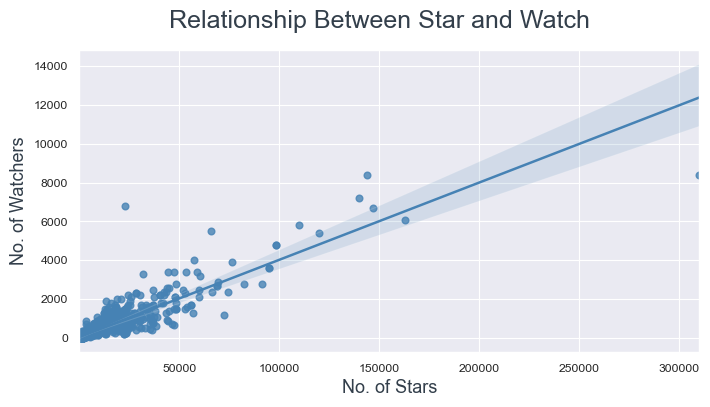

In [14]:
# Set figure size and dpi
fig, ax = plt.subplots(figsize=(8,4), dpi=100)

# Set seaborn theme for background grids
sns.set_theme("paper")

# Plot the data
sns.regplot(data=github_df, x="Star", y="Watch", color="#4682B4")

# Set x and y-axis labels and title
ax.set_xlabel("No. of Stars", fontsize=13, color="#333F4B")
ax.set_ylabel("No. of Watchers", fontsize=13, color="#333F4B")
fig.suptitle("Relationship Between Star and Watch", fontsize=18, color="#333F4B")
plt.show()

### Fork and Watch

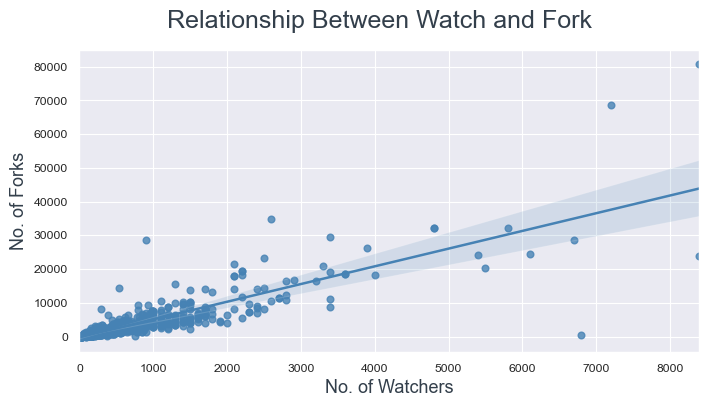

In [15]:
# Set figure size and dpi
fig, ax = plt.subplots(figsize=(8,4), dpi=100)

# Set seaborn theme for background grids
sns.set_theme("paper")

# Plot the data
sns.regplot(data=github_df, x="Watch", y="Fork", color="#4682B4")

# Set x and y-axis labels and title
ax.set_xlabel("No. of Watchers", fontsize=13, color="#333F4B")
ax.set_ylabel("No. of Forks", fontsize=13, color="#333F4B")
fig.suptitle("Relationship Between Watch and Fork", fontsize=18, color="#333F4B")
plt.show()

After plotting the relationships between the Star, Watch and Fork columns, we can see that the data points fit much closer to the regression line in the Fork and Watch plot as compared to the other two plots.

**From this, we can conclude that if a user is watching a repo, he or she is more likely to fork it as well.**

## 2. Analysis of Users with Large Number of Repositories

Let's take a look at users who have a large number of repositories.

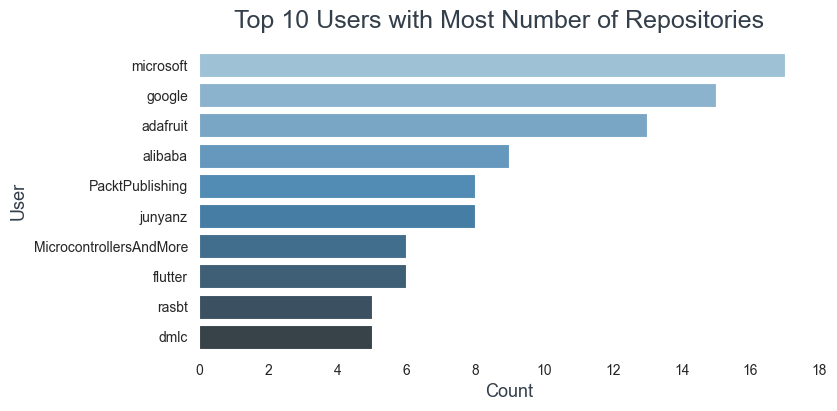

In [16]:
# Create a list of top 10 users with large number of repositories
large_repo_users = github_df.groupby("User_Name").size().nlargest(n=10).reset_index(name="Count")["User_Name"].to_list()

# Create a dataframe using users_large_repos list
large_repo_users_df = github_df[github_df["User_Name"].isin(large_repo_users)][["Topic", "User_Name", "Star"]]

# Set figure size and dpi
fig, ax = plt.subplots(figsize=(8,4), dpi=100)

# Add color to edge
plt.rcParams["axes.edgecolor"]="#333F4B"

# Customize spines and tick parameters
sns.despine(left=True, bottom=True)
ax.tick_params(axis="both", which="both", labelsize=10, bottom=False, left=False)
ax.set_xlim(0, 18)

# Remove grid and set background color
ax.grid(False)
ax.set_facecolor("white")

# Plot the data
sns.countplot(data=large_repo_users_df, y="User_Name", 
              order=large_repo_users_df["User_Name"].value_counts().index, palette=("Blues_d"))

# Set x and y-axis labels and title
ax.set_xlabel("Count", fontsize=13, color = "#333F4B")
ax.set_ylabel("User", fontsize=13, color = "#333F4B")
fig.suptitle("Top 10 Users with Most Number of Repositories", fontsize=18, color = "#333F4B")
plt.show()

From the plot above, we can tell that:

* *Microsoft tops the list with 17 repos.*
* *Followed by Google with 15 repos.*
* *Of all the users in the top 10, three seem to be individual users (junyanz, rasbt, MicrocontrollersAndMore)*

## 3. Understanding Contribution Activities across the Repositories

We can achieve this by plotting a heatmap to study the correlation between features in the data.

In [17]:
# Check if there are null values
github_df.isnull().sum()

Topic            0
Repo_Name        0
User_Name        0
Star             0
Fork             0
Watch            0
Issues           1
Pull_Requests    1
Topic_Tags       0
Commits          0
Contributors     5
dtype: int64

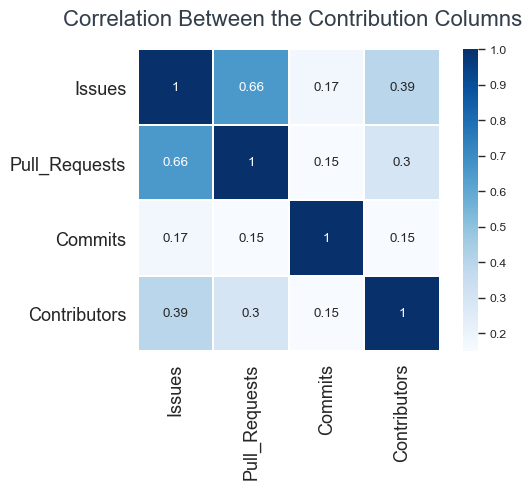

In [18]:
# Drop rows with any null values and create a dataframe with only the contribution columns
corr_df = github_df.dropna(axis=0, subset=["Issues", "Pull_Requests", "Contributors"])[["Issues", "Pull_Requests", "Commits", "Contributors"]]

# Set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# Customize tick parameters
ax.tick_params(labelsize=13, labelrotation=90)


# Plot the correlation in a heatmap
sns.heatmap(corr_df.corr(), linewidths=0.1, vmax=1.0, square=True, linecolor="white", annot=True, cmap="Blues")
fig.suptitle("Correlation Between the Contribution Columns", fontsize=16, color = "#333F4B")
plt.show()

From the heatmap above, we can tell that none of the parameters are strongly correlated. In fact, most of them are not dependent on any parameters. Perhaps the only two parameters with moderate positive correlation are the number of issues and pull requests.

Now, let us explore the correlation in the top 100 most popular repositories to study if there are no correlation as well.

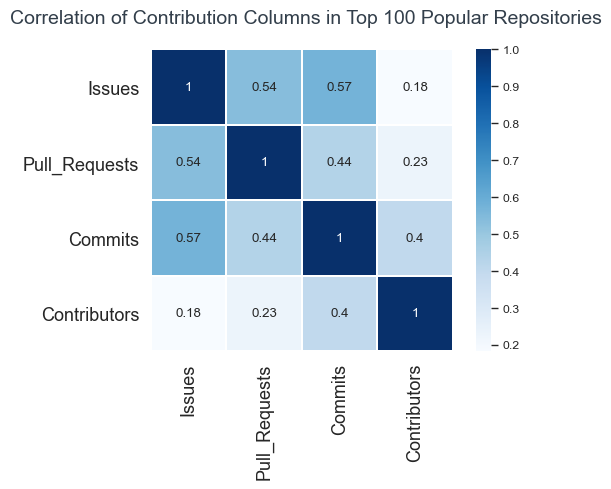

In [19]:
popular_df = github_df.nlargest(n=100, columns="Star")[["Issues", "Pull_Requests", "Commits", "Contributors"]]

# Set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# Customize tick parameters
ax.tick_params(labelsize=13, labelrotation=90)


# Plot the correlation in a heatmap
sns.heatmap(popular_df.corr(), linewidths=0.1, vmax=1.0, square=True, linecolor="white", annot=True, cmap="Blues")
fig.suptitle("Correlation of Contribution Columns in Top 100 Popular Repositories",fontsize=14, color = "#333F4B")
plt.show()

The results for the top 100 repositories does not differ much from the previous heatmap plot comprising of the entire dataset. So let's move on to users with large number of repositories instead and examine if there are any correlations between the parameters. 

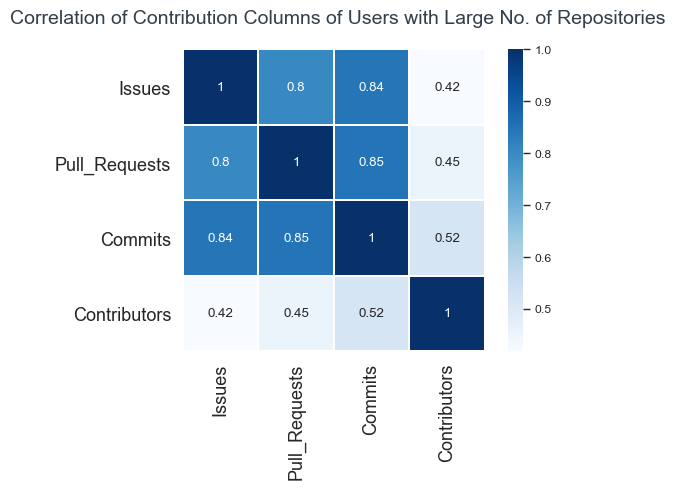

In [20]:
# Create a dataframe using large_repo_users list
large_repo_users_corrdf = github_df[github_df["User_Name"].isin(large_repo_users)][["Issues", "Pull_Requests", "Commits", "Contributors"]]

# Set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# Customize tick parameters
ax.tick_params(labelsize=13, labelrotation=90)


# Plot the correlation in a heatmap
sns.heatmap(large_repo_users_corrdf.corr(), linewidths=0.1, vmax=1.0, square=True, linecolor="white", annot=True, cmap="Blues")
fig.suptitle("Correlation of Contribution Columns of Users with Large No. of Repositories",fontsize=14, color = "#333F4B")
plt.show()

Unsurprisingly, users who are more active tend to have large number of repositories. From the heatmap above, we can see that there is a strong correlation between:

* Commits and pull requests
* Commits and issues
* Pull requests and issues

**Therefore, conclusions we can make are that there are no real relationships between contributon activities in the overall dataset, no correlation among contributon activities in the top 100 most popular repositories and users with many repositories tend to be contribute more.**

## 4. Analysis of Topic Tags

Adding topic tags to a repository helps with classification. It helps other users to easily find and contribute to relevant repos which are properly tagged. It also helps you and users nagivate through the platform much easily, looking for specifc repos by topic, type and interest. 

The Topic_Tags column consists of lists. To find the number of popular tags, we can first group the data into a list of lists and count the occurrence of each tag. Then, with this data, we can perform visualization processes to examine the popularity of the tags.

In [21]:
# Take a look at first five entries of Topic_Tags column
github_df[["Topic_Tags"]].head()

,Topic_Tags
0,"['deep-learning', 'tensorflow', 'neural-networ..."
1,"['machine-learning', 'python', 'statistics', '..."
2,"['scikit-learn', 'numpy', 'python', 'jupyter-n..."
3,"['bayesian-methods', 'pymc', 'mathematical-ana..."
4,[]


In [22]:
import ast
from collections import Counter

# Convert column to list of lists
topic_tag_list = github_df["Topic_Tags"].apply(lambda x: ast.literal_eval(x)).to_list()

# Split all lists and select individual items
all_tags = [tag for item in topic_tag_list for tag in item]

# Count the occurrence of each tag
tag_dict = Counter(all_tags)

# Create a dataframe with top 15 most tags
toptags_df = pd.DataFrame(tag_dict.most_common(15), columns=["Name of the Tag", "Count"])

# View first five rows of dataframe
toptags_df.head()

,Name of the Tag,Count
0,machine-learning,236
1,deep-learning,214
2,python,149
3,computer-vision,127
4,javascript,123


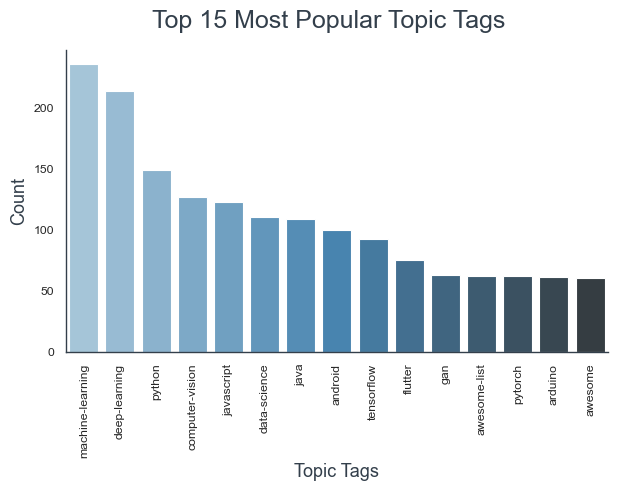

In [23]:
# Set figure size and dpi
fig, ax = plt.subplots(figsize=(7,4), dpi=100)

# Rotate the labels along x-axis
plt.xticks(rotation=90)
ax.grid(False)

# Customize spine, remove grid and set background color
sns.despine()
ax.grid(False)
ax.set_facecolor("white")

# Plot the data
sns.barplot(data=toptags_df, x="Name of the Tag", y="Count", palette=("Blues_d"))

# set x and y-axis labels and title
ax.set_xlabel("Topic Tags", fontsize=13, color = "#333F4B")
ax.set_ylabel("Count", fontsize=13, color = "#333F4B")
fig.suptitle("Top 15 Most Popular Topic Tags", fontsize=18, color = "#333F4B")
plt.show()

In [24]:
# Length of tags list in each column
len_tags = [len(tag) for tag in topic_tag_list]

# Create a new column
github_df["Total_Tags"] = len_tags

# Group based on topic and calculate total_tags in each topic
topic_wise_tag = github_df.groupby("Topic").sum()["Total_Tags"].reset_index(name="Total Tags")

# View first five rows of total tags dataframe grouped by topics
topic_wise_tag.head()

,Topic,Total Tags
0,Android-studio,482
1,Arduino,577
2,Computer-Vision,935
3,Data-Science,911
4,GAN,618


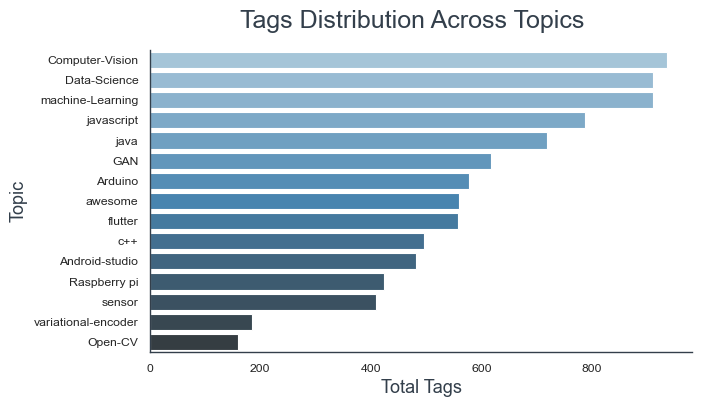

In [25]:
# Sort the dataframe in descending order to display nicer barplot 
topic_wise_tag = topic_wise_tag.sort_values(ascending=False, by="Total Tags").reset_index().drop(["index"], axis=1)

# Set figure size and dpi
fig, ax = plt.subplots(figsize=(7,4), dpi=100)

# Rotate the labels along x-axis

# Remove background grids
ax.grid(False)
ax.set_facecolor('white')
sns.despine()

# Plot the data
sns.barplot(data=topic_wise_tag, x="Total Tags", y="Topic", ci=None, palette=("Blues_d"))

# set x and y-axis labels and title
ax.set_xlabel("Total Tags", fontsize=13, color = "#333F4B")
ax.set_ylabel("Topic", fontsize=13, color = "#333F4B")
fig.suptitle("Tags Distribution Across Topics", fontsize=18, color = "#333F4B")
plt.show()

**From the bar plot above, we can see that repositories with topics Computer Vision, Data Science, and Machine Learning tend to be tagged more.**

Now, let's finish up with a wordcloud of topic tags!

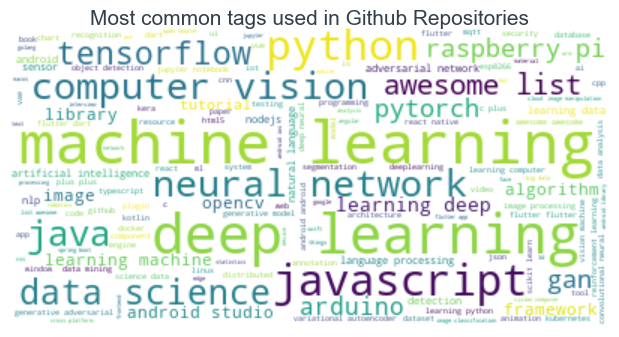

In [26]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# Create a string with all the topic tags
github_tags = (" ").join(all_tags)

# Instantiate a word cloud object
tags_wc = WordCloud(
    background_color="white",
    max_font_size=120,
    max_words=200)

# Generate the word cloud
tags_wc.generate(github_tags)

# Plot wordcloud and set title
plt.figure(figsize=(6,6),dpi=100)
plt.imshow(tags_wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Most common tags used in Github Repositories",fontdict={"size": 15, "color": "#333F4B", "verticalalignment": "center"})
plt.show()

## Conclusion

If we had data going back a decade ago, I am certain the trend would look quite different. From this report, we can see that in recent years, topics involving Data Science has become increasingly popular. For instance, interests in topics like Machine Learning, Deep Learning, Python and Computer Vision have seen their popularity grown in numbers over the past few years! 